In [1]:
import os
sys.path.append("C:\\Users\\Andrew\\OneDrive - University College London\\_PhD\\Papers - Drafts\\J5_JASA_Lockdown-SS")

import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.set_context("paper", font_scale=1.4)

from scripts import lockdown_mlm as mlm

# Define some constants and options
## variables
dep_vars = ["Natural", "Traffic", "Human", "Other", "loudness", "overall", "Pleasant", "Eventful"]

FEATS_LISTS = mlm.FEATS_LISTS
remove = ["FS_TEMP", "LAeq_TEMP", "LCeq_TEMP", "LZeq_TEMP", "I_TEMP", "N_TEMP", "R_TEMP", "S_TEMP", "SIL_TEMP", "THD_TEMP", "T_TEMP"]

for k in remove:
    FEATS_LISTS.pop(k, None)

acoustic_vars = sorted({x for v in FEATS_LISTS.values() for x in v})

# ##################################################################
# Load Data

DATA_DIR = Path("C:/Users/Andrew/OneDrive - University College London/_PhD/Papers - Drafts/J5_JASA_Lockdown-SS/data")
RESULTS_DIR = Path("C:/Users/Andrew/OneDrive - University College London/_PhD/Papers - Drafts/J5_JASA_Lockdown-SS/results")

ssidData = pd.read_csv(DATA_DIR.joinpath("2020-08-13/LondonVeniceBINResults_2020-08-13_4.csv"))
prelockdownData = pd.read_csv(RESULTS_DIR.joinpath("2020-09-08/prelockdownData-R-Predict_3.csv"))
lockdownData = pd.read_csv(RESULTS_DIR.joinpath("2020-09-08/lockdownData-R-Predict_3.csv"))

ordered_locations = sorted(set(prelockdownData.LocationID))


### Contour plot of Prelockdown ACTUAL Data

Text(0.5, 0.98, 'Prelockdown ACTUAL Data')

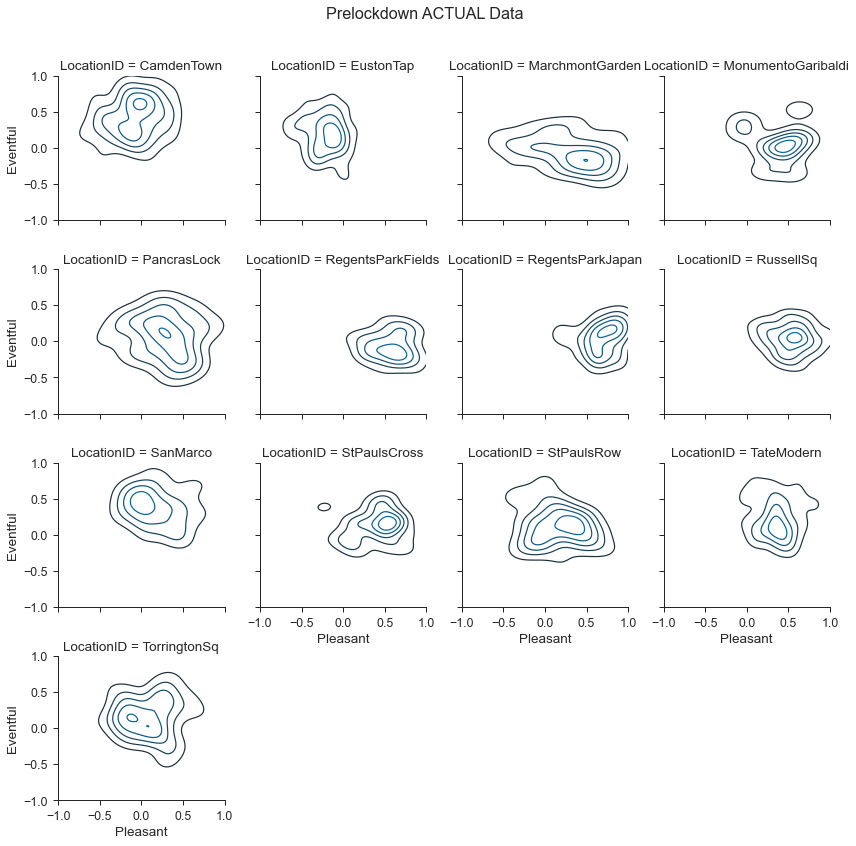

In [117]:
g = sns.FacetGrid(prelockdownData[["LocationID", "Pleasant", "Eventful"]], col="LocationID", col_wrap=4, col_order=ordered_locations, xlim=(-1,1), ylim=(-1,1), legend_out=True)
g.map(sns.kdeplot,'Pleasant', 'Eventful', n_levels=5, aspect=1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Prelockdown ACTUAL Data')


### Contour plot of Prelockdown MODELED Data

Text(0.5, 0.98, 'Prelockdown MODELED Data')

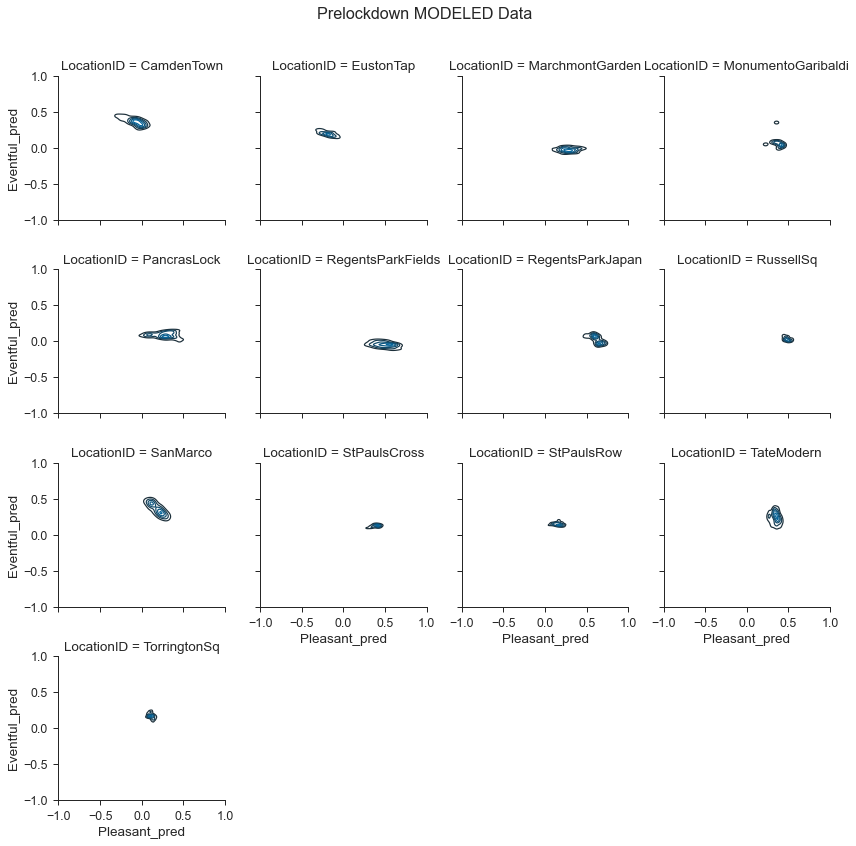

In [116]:
g = sns.FacetGrid(prelockdownData[["LocationID", "Pleasant_pred", "Eventful_pred"]], col="LocationID", col_order=ordered_locations, col_wrap=4, xlim=(-1,1), ylim=(-1,1), legend_out=True)
g.map(sns.kdeplot,'Pleasant_pred', 'Eventful_pred', n_levels=5, aspect=1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Prelockdown MODELED Data')

### Contour plots of During Lockdown PREDICTED Data

Text(0.5, 0.98, 'Lockdown PREDICTED Data')

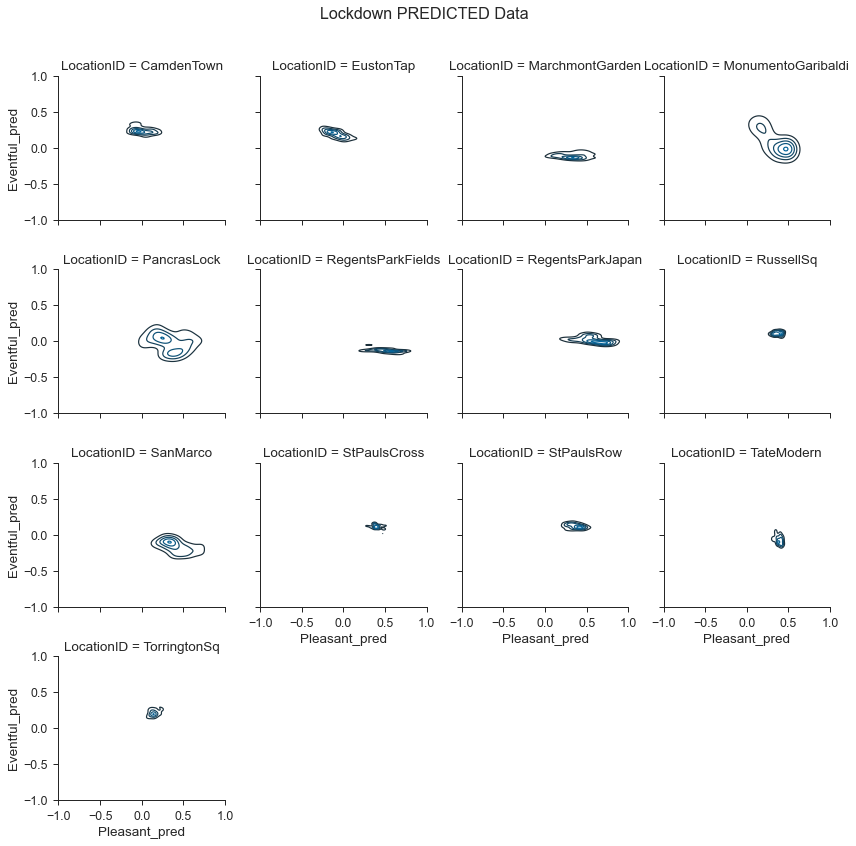

In [118]:
g = sns.FacetGrid(lockdownData[["LocationID", "Pleasant_pred", "Eventful_pred"]], col="LocationID", col_order=ordered_locations, col_wrap=4, xlim=(-1,1), ylim=(-1,1))
g.map(sns.kdeplot,'Pleasant_pred', 'Eventful_pred', n_levels=5, aspect=1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Lockdown PREDICTED Data')

## Combining data into one dataframe

In [5]:
combinedData = pd.concat([prelockdownData, lockdownData])
combinedData.loc[combinedData.Lockdown==2, 'Pleasant'] = combinedData.loc[combinedData.Lockdown==2, 'Pleasant_pred']
combinedData.loc[combinedData.Lockdown==2, 'Eventful'] = combinedData.loc[combinedData.Lockdown==2, 'Eventful_pred']
combinedData.loc[combinedData.Lockdown==2, 'Natural'] = combinedData.loc[combinedData.Lockdown==2, 'Natural_pred']
combinedData.loc[combinedData.Lockdown==2, 'Human'] = combinedData.loc[combinedData.Lockdown==2, 'Human_pred']
combinedData.loc[combinedData.Lockdown==2, 'Traffic'] = combinedData.loc[combinedData.Lockdown==2, 'Traffic_pred']
combinedData.loc[combinedData.Lockdown==2, 'Other'] = combinedData.loc[combinedData.Lockdown==2, 'Other_pred']
combinedData.loc[combinedData.Lockdown==2, 'overall'] = combinedData.loc[combinedData.Lockdown==2, 'overall_pred']
combinedData.loc[combinedData.Lockdown==2, 'loudness'] = combinedData.loc[combinedData.Lockdown==2, 'loudness_pred']


### Comparison of Pleasant and Eventful from Prelockdown (Actual) to Lockdown (Predicted)

Text(0.5, 0.98, 'Change in Pleasant and Eventful Ratings during Lockdown')

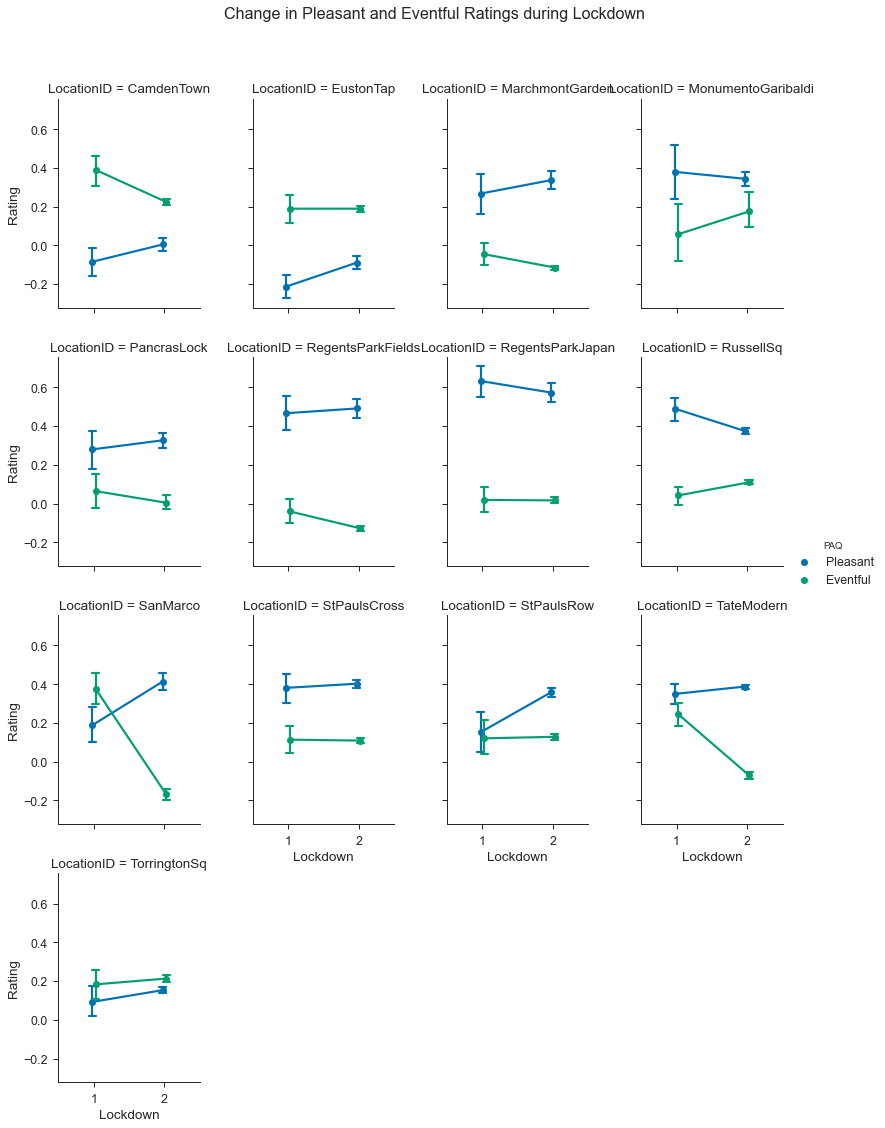

In [119]:
df = combinedData.melt(id_vars=['GroupID', 'LocationID', 'Lockdown'], value_vars=['Pleasant', 'Eventful'], var_name='PAQ', value_name='Rating')
g = sns.catplot(x="Lockdown", y="Rating",
                col="LocationID", col_order=ordered_locations, col_wrap=4, 
                data=df, kind="point", hue='PAQ',
                dodge=True, 
                height=4, aspect=.7,
                capsize=.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Change in Pleasant and Eventful Ratings during Lockdown')

### Comparison of Sound Sources from Prelockdown (Actual) to Lockdown (Predicted)

Text(0.5, 0.98, 'Change in Sound Sources during Lockdown')

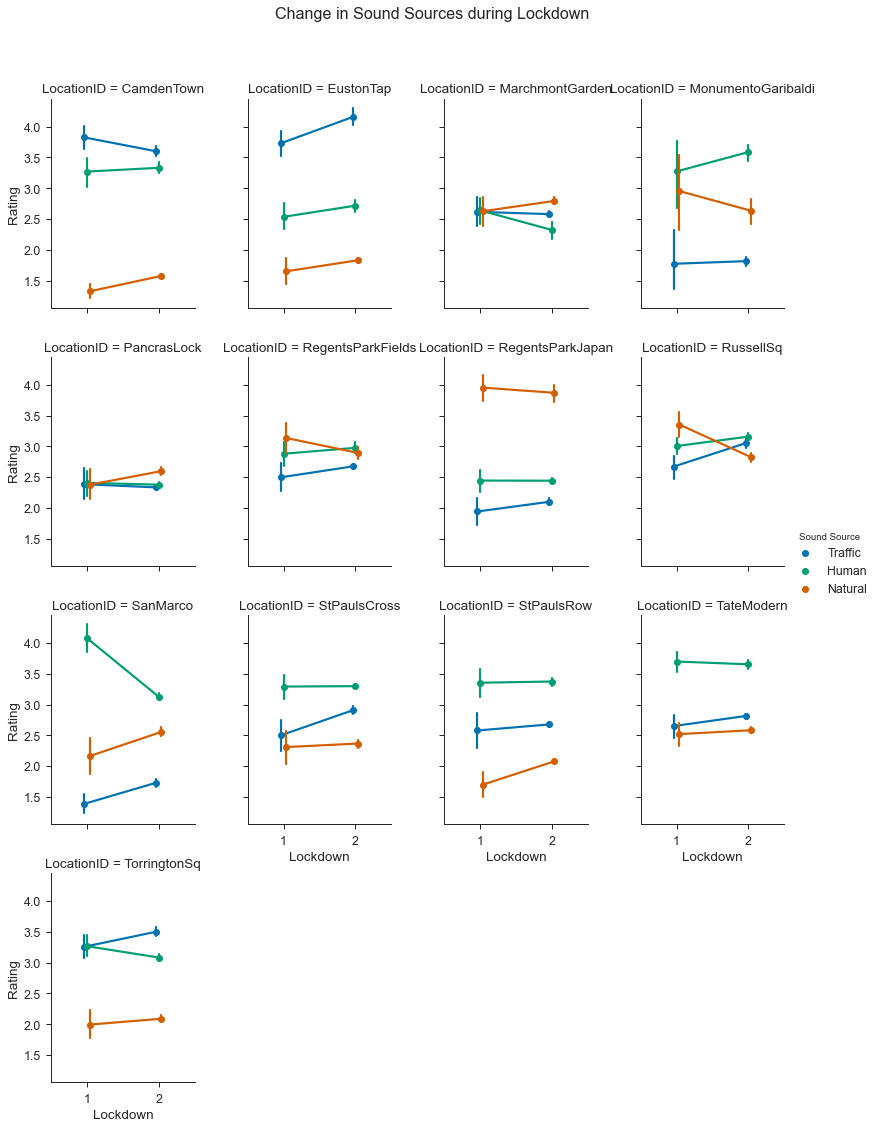

In [124]:
df = combinedData.melt(id_vars=['GroupID', 'LocationID', 'Lockdown'], value_vars=['Traffic', 'Human', 'Natural'], var_name='Sound Source', value_name='Rating')
g = sns.catplot(x="Lockdown", y="Rating",
                col="LocationID", col_order=ordered_locations, col_wrap=4, 
                data=df, kind="point", hue='Sound Source',
                dodge=True, 
                height=4, aspect=.7,
                # capsize=.1
                )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Change in Sound Sources during Lockdown')

### Location means of soundscape assessments Pre Lockdown (==1, Actual) and During Lockdown (==2, Predicted)

In [128]:
prelockdown_summary = prelockdownData[['LocationID', 'Pleasant', 'Eventful', 'Natural', 'Traffic', 'Human', 'Other', 'overall', 'loudness', 'Lockdown']].groupby("LocationID").mean()
lockdown_summary = lockdownData[['LocationID', 'Pleasant_pred', 'Eventful_pred', 'Natural_pred', 'Traffic_pred', 'Human_pred', 'Other_pred', 'overall_pred', 'loudness_pred', 'Lockdown']].groupby("LocationID").mean()
lockdown_summary = lockdown_summary.rename(columns={
    'Pleasant_pred': 'Pleasant', 
    'Eventful_pred': 'Eventful', 
    'Natural_pred': 'Natural',
    'Traffic_pred': 'Traffic',
    'Human_pred': 'Human',
    'Other_pred': 'Other',
    'overall_pred': 'overall', 
    'loudness_pred': 'loudness',
    })
summaries = pd.concat([prelockdown_summary, lockdown_summary])
summaries['LocationID'] = summaries.index.values
summaries

,Pleasant,Eventful,Natural,Traffic,Human,Other,overall,loudness,Lockdown,LocationID
LocationID,,,,,,,,,,
CamdenTown,-0.085017,0.389827,1.325146,3.825731,3.270760,2.700000,2.815789,3.561404,1,CamdenTown
EustonTap,-0.212548,0.189456,1.650314,3.730189,2.535220,2.860377,2.684277,3.323899,1,EustonTap
MarchmontGarden,0.267471,-0.045435,2.625641,2.616667,2.641026,2.407692,3.560256,2.544872,1,MarchmontGarden
MonumentoGaribaldi,0.379609,0.057862,2.954545,1.772727,3.272727,1.590909,4.181818,2.409091,1,MonumentoGaribaldi
PancrasLock,0.279305,0.064004,2.377315,2.385417,2.407407,3.172454,3.556111,2.905556,1,PancrasLock
RegentsParkFields,0.466470,-0.040805,3.136111,2.497222,2.880556,1.922222,4.280556,2.447222,1,RegentsParkFields
RegentsParkJapan,0.632678,0.018787,3.954938,1.941975,2.444444,1.580864,4.591975,2.769136,1,RegentsParkJapan
RussellSq,0.489734,0.041965,3.354938,2.672325,3.005144,2.044239,4.023148,2.966564,1,RussellSq
SanMarco,0.187516,0.376335,2.162626,1.386869,4.077273,1.913636,3.565152,3.188384,1,SanMarco


### Circumplex plots of Location Means Pre- and During- Lockdown

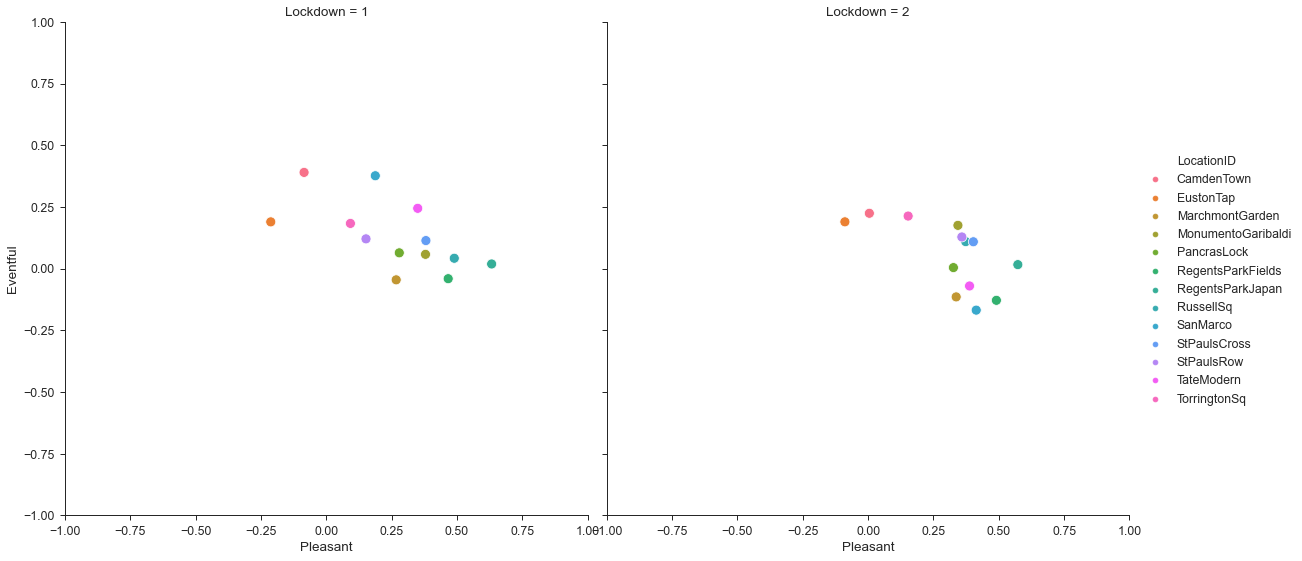

In [125]:
ps = sns.relplot(x="Pleasant", y="Eventful", data = summaries, kind='scatter', hue="LocationID", height=8, aspect=1, col='Lockdown', s=100)
ps.set(xlim = (-1,1))
ps.set(ylim = (-1,1))


### Change in circumplex soundscape position during Lockdown

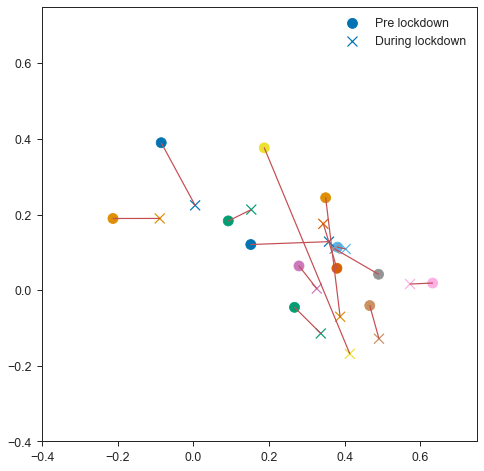

In [126]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use('seaborn-colorblind')
# sns.set_context("paper", font_scale=1.4)
ax.scatter(x='Pleasant', y='Eventful', data=summaries[summaries['Lockdown']==1], c=sns.color_palette('colorblind', n_colors=13), label='Pre lockdown', s=100)
ax.scatter(x='Pleasant', y='Eventful', data=summaries[summaries['Lockdown']==2], c=sns.color_palette('colorblind', n_colors=13), marker='x', label='During lockdown', s=100)
for location in set(summaries['LocationID']):
    pre_x = summaries['Pleasant'][summaries['Lockdown']==1][location]
    pre_y = summaries['Eventful'][summaries['Lockdown']==1][location]
    during_x = summaries['Pleasant'][summaries['Lockdown']==2][location]
    during_y = summaries['Eventful'][summaries['Lockdown']==2][location]
    ax.plot([pre_x, during_x], [pre_y, during_y], c='r')
ax.set_xlim(-.4, .75)
ax.set_ylim(-.4, .75)
ax.set_aspect('equal')
ax.legend()
plt.show()

### Differences in soundscape assessments from Lockdown (During[Predicted] - Pre[Actual])

In [129]:
diff_summaries = pd.DataFrame(summaries.loc[summaries.Lockdown==1, "LocationID"])
diff_summaries["Pleasant_diff"]  = summaries.loc[summaries.Lockdown==2, "Pleasant"] - summaries.loc[summaries.Lockdown==1]["Pleasant"]
diff_summaries["Eventful_diff"]  = summaries.loc[summaries.Lockdown==2, "Eventful"] - summaries.loc[summaries.Lockdown==1]["Eventful"]
diff_summaries["Traffic_diff"]  = summaries.loc[summaries.Lockdown==2, "Traffic"] - summaries.loc[summaries.Lockdown==1]["Traffic"]
diff_summaries["Natural_diff"]  = summaries.loc[summaries.Lockdown==2, "Natural"] - summaries.loc[summaries.Lockdown==1]["Natural"]
diff_summaries["Human_diff"]  = summaries.loc[summaries.Lockdown==2, "Human"] - summaries.loc[summaries.Lockdown==1]["Human"]
diff_summaries["Other_diff"]  = summaries.loc[summaries.Lockdown==2, "Other"] - summaries.loc[summaries.Lockdown==1]["Other"]
diff_summaries["overall_diff"]  = summaries.loc[summaries.Lockdown==2, "overall"] - summaries.loc[summaries.Lockdown==1]["overall"]
diff_summaries["loudness_diff"]  = summaries.loc[summaries.Lockdown==2, "loudness"] - summaries.loc[summaries.Lockdown==1]["loudness"]
diff_summaries

,LocationID,Pleasant_diff,Eventful_diff,Traffic_diff,Natural_diff,Human_diff,Other_diff,overall_diff,loudness_diff
LocationID,,,,,,,,,
CamdenTown,CamdenTown,0.089724,-0.165594,-0.224959,0.250266,0.060953,0.050695,0.238253,-0.412873
EustonTap,EustonTap,0.123661,0.000158,0.426575,0.179617,0.181334,0.412643,0.299886,-0.278970
MarchmontGarden,MarchmontGarden,0.069527,-0.069149,-0.037086,0.168290,-0.318957,0.183687,0.026029,-0.122882
MonumentoGaribaldi,MonumentoGaribaldi,-0.035931,0.117467,0.042302,-0.319375,0.314042,0.813068,-0.221946,0.700000
PancrasLock,PancrasLock,0.047073,-0.059856,-0.051755,0.220911,-0.029710,-0.247146,0.293759,-0.068025
RegentsParkFields,RegentsParkFields,0.024417,-0.087633,0.177118,-0.241923,0.095831,-0.197774,-0.049991,-0.387898
RegentsParkJapan,RegentsParkJapan,-0.059766,-0.002633,0.157186,-0.084757,-0.001836,0.020688,-0.053147,-0.018209
RussellSq,RussellSq,-0.116216,0.067437,0.378966,-0.528874,0.152887,1.009361,-0.270820,-0.426289
SanMarco,SanMarco,0.226202,-0.544597,0.341899,0.393116,-0.951825,1.014271,0.164901,-0.752740


### Rankings of degree of change for each soundscape assessment

In [133]:
diff_summaries.drop("LocationID", axis=1).abs().rank()

,Pleasant_diff,Eventful_diff,Traffic_diff,Natural_diff,Human_diff,Other_diff,overall_diff,loudness_diff
LocationID,,,,,,,,
CamdenTown,9.0,11.0,8.0,9.0,6.0,2.0,10.0,9.0
EustonTap,11.0,1.0,13.0,6.0,9.0,9.0,13.0,6.0
MarchmontGarden,8.0,8.0,1.0,5.0,12.0,5.0,2.0,4.0
MonumentoGaribaldi,3.0,10.0,2.0,10.0,11.0,10.0,9.0,12.0
PancrasLock,5.0,6.0,3.0,7.0,4.0,7.0,12.0,2.0
RegentsParkFields,2.0,9.0,7.0,8.0,7.0,6.0,3.0,7.0
RegentsParkJapan,6.0,2.0,5.0,3.0,1.0,1.0,4.0,1.0
RussellSq,10.0,7.0,11.0,13.0,8.0,12.0,11.0,10.0
SanMarco,13.0,13.0,10.0,12.0,13.0,13.0,8.0,13.0


In [139]:
from scipy.stats import ranksums
ranksums(prelockdownData.loc[prelockdownData.LocationID=="StPaulsCross", "Pleasant"], lockdownData.loc[lockdownData.LocationID=="StPaulsCross", "Pleasant"])

RanksumsResult(statistic=-6.902684899626334, pvalue=5.102873691987208e-12)

In [140]:
from scipy.stats import wilcoxon
# Are the actual and predicted values for the prelockdownData from the same sample? if p>0.05, yes
wilcoxon(prelockdownData["Pleasant"], prelockdownData["Pleasant_pred"])

WilcoxonResult(statistic=103752.0, pvalue=0.25052928034404)

In [144]:
from scipy.stats import mannwhitneyu
# Are the predicted values for the prelockdownData and lockdownData from the same sample? if p>0.05, yes
mannwhitneyu(prelockdownData["Pleasant_pred"], lockdownData["Pleasant_pred"])

MannwhitneyuResult(statistic=173420.0, pvalue=0.005299326147889168)